<a href="https://colab.research.google.com/github/effat/MLP-Demo/blob/main/MLP.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Load Libraries**

In [1]:
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
from sklearn import datasets
from sklearn.model_selection import train_test_split, validation_curve
from sklearn.metrics import confusion_matrix
import seaborn as sns


To ensure we get reproducible results (on your local machine) we set the random seed for Python, Numpy and TensorFlow. This will ensure the SAME random initialization of weight matrices each tiem you execute your code.
In Colab, results might not be reproducable.

In [2]:
seed=1234
import os
os.environ['PYTHONHASHSEED'] = str(seed)
# For working on GPUs from "TensorFlow Determinism"
os.environ['CUDA_VISBLE_DEVICE'] = ''
import numpy as np
np.random.seed(seed)
import random
random.seed(seed)
import tensorflow as tf
tf.random.set_seed(seed)


# **Import Dataset**

In [3]:

digits = datasets.load_digits()

In [ ]:
#scikit-learn's datasets module, does not have an attribute named 'columns'. Bunch objects are similar to dictionaries and are commonly used in scikit-learn to store datasets. They usually have attributes like 'data', 'target', 'feature_names',
#and 'DESCR', but not 'columns'.


In [4]:
### print dictionary entries of the scikit-learn's datasets module: digits dataset
for key in digits.keys():
    print(key)

data
target
frame
feature_names
target_names
images
DESCR


In [5]:
digits.DESCR

".. _digits_dataset:\n\nOptical recognition of handwritten digits dataset\n--------------------------------------------------\n\n**Data Set Characteristics:**\n\n    :Number of Instances: 1797\n    :Number of Attributes: 64\n    :Attribute Information: 8x8 image of integer pixels in the range 0..16.\n    :Missing Attribute Values: None\n    :Creator: E. Alpaydin (alpaydin '@' boun.edu.tr)\n    :Date: July; 1998\n\nThis is a copy of the test set of the UCI ML hand-written digits datasets\nhttps://archive.ics.uci.edu/ml/datasets/Optical+Recognition+of+Handwritten+Digits\n\nThe data set contains images of hand-written digits: 10 classes where\neach class refers to a digit.\n\nPreprocessing programs made available by NIST were used to extract\nnormalized bitmaps of handwritten digits from a preprinted form. From a\ntotal of 43 people, 30 contributed to the training set and different 13\nto the test set. 32x32 bitmaps are divided into nonoverlapping blocks of\n4x4 and the number of on pixel

# **Dataset Features**

In [6]:
X = digits['images']
y = digits['target']
target_names = digits['target_names']

# **Print Dimensions of Input Matrices and Visualize**

In [7]:
print('Images (x) Shape : ',{X.shape})
print('Target (y) Shape : ',{y.shape})
print("Target name size", len(target_names))

Images (x) Shape :  {(1797, 8, 8)}
Target (y) Shape :  {(1797,)}
Target name size 10


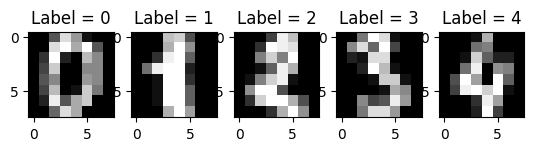

In [8]:
import matplotlib.pyplot as plt
### display first five images with true labels
for i in range(5):
    plt.subplot(1, 5, i + 1)
    plt.imshow(X[i] , cmap='gray')
    plt.title("Label = "+ str(y[i]))


In [9]:
n_samples = len(X)
print(n_samples)
print(X.shape[0])

1797
1797


# **Reshape and Scale the Input Matrix**

Flatten each input image (a 2D array) to a 1D array. In Python, this can be done by reshape operation.

Reshaping the Input
The -1 is a placeholder that means “adjust this dimension to make the data fit”

In [10]:

X = X.reshape((n_samples, -1))
print(f"After reshape and before scaling= {X.shape}")
print(X[0])

After reshape and before scaling= (1797, 64)
[ 0.  0.  5. 13.  9.  1.  0.  0.  0.  0. 13. 15. 10. 15.  5.  0.  0.  3.
 15.  2.  0. 11.  8.  0.  0.  4. 12.  0.  0.  8.  8.  0.  0.  5.  8.  0.
  0.  9.  8.  0.  0.  4. 11.  0.  1. 12.  7.  0.  0.  2. 14.  5. 10. 12.
  0.  0.  0.  0.  6. 13. 10.  0.  0.  0.]


We have to "Normalize" to scale the features. From digits.DESCR, we know that each entry of the input image matrix is an intiger in the range of 0...16. Scale the input [0-1] by dividing 15. This is called the min-max normalization

In [11]:
X = X / 15.0
print("After scaling", X[0])

After scaling [0.         0.         0.33333333 0.86666667 0.6        0.06666667
 0.         0.         0.         0.         0.86666667 1.
 0.66666667 1.         0.33333333 0.         0.         0.2
 1.         0.13333333 0.         0.73333333 0.53333333 0.
 0.         0.26666667 0.8        0.         0.         0.53333333
 0.53333333 0.         0.         0.33333333 0.53333333 0.
 0.         0.6        0.53333333 0.         0.         0.26666667
 0.73333333 0.         0.06666667 0.8        0.46666667 0.
 0.         0.13333333 0.93333333 0.33333333 0.66666667 0.8
 0.         0.         0.         0.         0.4        0.86666667
 0.66666667 0.         0.         0.        ]


# **Split the Dataset**

First, we will split the dataset into training and test set. Next, we will split the training set into traing and validation set.

Training and Test set Split


The test_size=0.2 indicates 20% of the input data will be test set.

In [12]:
X_train_all, X_test, y_train_all, y_test = train_test_split(X, y, test_size=0.2, random_state=32)

 Training and Validation Set split.

 20% of the training data is used as validation set. Note, here the input data is training set: which is split into the training and the validation set.

In [13]:
X_train, X_val, y_train, y_val = train_test_split(X_train_all, y_train_all, test_size=0.2, random_state=32)

In [14]:
print(X_train.shape)
print(X_val.shape)
print(X_test.shape)

(1149, 64)
(288, 64)
(360, 64)


# **Defining the Model**
1. First we will flatten our 8x8 image into a 64 element vector. We will denote it by n_features = 64 in the code. We flatten our input, as MLPs cannot handle two or three-dimensional data.

2. Next, the 64 element vector input is passed through the first hidden layer (hidden_dim_1) to transform it into 64 dimensions.

3. Then, the second hidden layer (hidden_dim_2) will transform it to 32 dimensions.

4. Finally, an output layer which will transform it into a 10 dimensional vector. As we have ten digits, 0 - 9, so need our output to be 10 dimensions (num_classes).

The prepare_model() method constructs the model.

In [15]:

from tensorflow.keras.models import Sequential # Changed tf.keras.models to tensorflow.keras.models
from tensorflow.keras.layers import Dense # Changed tf.keras.layers to tensorflow.keras.layers



def prepare_model():
  hidden_dim_1 = 32
  hidden_dim_2 = 16
  num_classes = len(target_names)
  n_features = X_train.shape[1]



  model = Sequential()
  ### define hidden dimension, input feature, and the activation function. The input dimenson is input_shape= (n_features,), output dimension is hidden_dim_1
  model.add(Dense(hidden_dim_1, input_shape= (n_features,), activation='relu'))
  ### The second hidden layer receives input from the previous layer, which has the size of hidden_dim_1. The output of this layer has a dimension of hidden_dim_2
  model.add(Dense(hidden_dim_2, activation='relu'))

  ### The third layer receives input from the previous layer, which has the size of hidden_dim_2. The output of this layer has a dimension of num_classes
  model.add(Dense(num_classes, activation='softmax'))

  #sparse_categorical_crossentropy:"Use this crossentropy loss function when there are two or more label classes. We expect labels to be provided as integers."
  ## categoriacl crossentropy: We expect labels to be provided as on-hot encoded for two or more categories.
  opt = tf.keras.optimizers.Adam(learning_rate= 0.001)
  model.compile(optimizer= opt, loss= 'sparse_categorical_crossentropy', metrics=['accuracy'])

  print(model.summary())

  return model




In [16]:
my_model = prepare_model()

/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense (Dense)                        │ (None, 32)                  │           2,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 16)                  │             528 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 10)                  │             170 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 2,778 (10.85 KB)

 Trainable params: 2,778 (10.85 KB)

 Non-trainable params: 0 (0.00 B)

None



# **Model's Parameters Explanation**
The print(model.summary()) prints model parameters at each layer. We explain it below.

*   For the first dense layer , number of params is 2,080. This is obtained as : 64 (input values) * 32 (neurons in the first layer, hidden_dim_1) + 32 (bias values for neuron in the first layer)

*   For the second dense layer , number of params is 528. This is obtained as : 32 (input values) * 16 (neurons in the first layer, hidden_dim_2) + 16 (bias values for neuron in the second layer)


*   For the output dense layer , number of params is 170. This is obtained as : 16 (input values) * 10 (neurons in the third, num_classes) + 10 (bias values for neuron in the third/output layer)




# **Early Stopping**

We will use Early stopping criteria as a regularization technique on the validation set. The code below indicates if the validation set performance does not improve for 5 epochs, then the training will terminate.

We can also execute the code without early stopping criteria. In that case, the training will terminate after the epoch mentioned. You can try the commented out code to explore withoutr early stopping.

In [17]:
## without early stopping.
#
#history = my_model.fit(X_train, y_train, validation_data=(X_val, y_val), batch_size= 64, epochs= 250)

In [18]:
## With Early stopping
es_callback = tf.keras.callbacks.EarlyStopping(monitor='val_loss', patience=5)
### captures the training and validation loss in each epoch. This will be used to plot and visualize
history = my_model.fit(X_train, y_train, validation_data=(X_val, y_val), batch_size= 64, epochs= 250, callbacks=[es_callback])



Epoch 1/250
18/18 ━━━━━━━━━━━━━━━━━━━━ 1s 14ms/step - accuracy: 0.1119 - loss: 2.3042 - val_accuracy: 0.2465 - val_loss: 2.1909
Epoch 2/250
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.3109 - loss: 2.1558 - val_accuracy: 0.4444 - val_loss: 2.0484
Epoch 3/250
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.4176 - loss: 2.0059 - val_accuracy: 0.4792 - val_loss: 1.8570
Epoch 4/250
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.4767 - loss: 1.8078 - val_accuracy: 0.5347 - val_loss: 1.6337
Epoch 5/250
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.5392 - loss: 1.5790 - val_accuracy: 0.6319 - val_loss: 1.3978
Epoch 6/250
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.6631 - loss: 1.3412 - val_accuracy: 0.7326 - val_loss: 1.1595
Epoch 7/250
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7590 - loss: 1.1117 - val_accuracy: 0.8194 - val_loss: 0.9491
Epoch 8/250
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.8318 - loss: 0.9179 - val_accuracy: 0.8542 - 

# **Plot Training and Validation Loss**
Can be used to monitor model tarining and detect overfitting/underfitting.

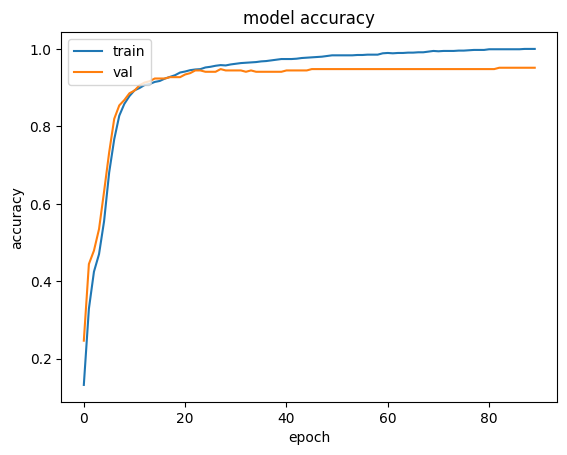

In [19]:
#Plot history
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()

# **Test Error**

In [20]:
### mat = np.argmax(my_model.predict(X_test))
#print(mat)
## will take the maximum number of the entire test data matrix.

## Specifying np.argmax(my_model.predict(X_test), axis=-1) means: for each image in the test set, the predicted output is an array of 10 entries [0-9]. We take the
## maximum of the prediction---which is the class label
y_pred = np.argmax(my_model.predict(X_test), axis=-1)

12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step 


In [21]:
from sklearn import metrics
test_accuracy = metrics.accuracy_score(y_test, y_pred)
print("Test Accuracy: %.2f"%(test_accuracy))

Test Accuracy: 0.98


# **Confusion Matrix**

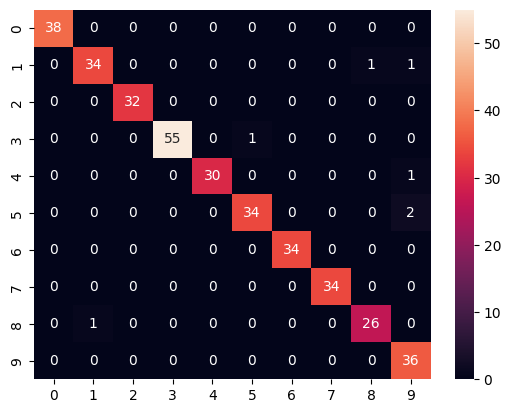

In [22]:
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True)
plt.show()


# **Print Classification Report**

In [23]:
print(metrics.classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        38
           1       0.97      0.94      0.96        36
           2       1.00      1.00      1.00        32
           3       1.00      0.98      0.99        56
           4       1.00      0.97      0.98        31
           5       0.97      0.94      0.96        36
           6       1.00      1.00      1.00        34
           7       1.00      1.00      1.00        34
           8       0.96      0.96      0.96        27
           9       0.90      1.00      0.95        36

    accuracy                           0.98       360
   macro avg       0.98      0.98      0.98       360
weighted avg       0.98      0.98      0.98       360

